In [12]:
 import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/pollen-grain-image-classification")

print("Path to dataset files:", path)

100%|██████████| 24.1M/24.1M [00:00<00:00, 222MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/pollen-grain-image-classification/versions/1


In [13]:
import os

# Print subfolders (these are often class names)
class_folders = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

print("Classes found in dataset:")
for class_name in class_folders:
    print(class_name)



Classes found in dataset:


In [14]:
import pandas as pd

csv_path = os.path.join(path, "labels.csv")

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print("Unique classes from CSV:")
    print(df['label'].unique())
else:
    print("No labels.csv found. Classes may be in folder names.")



No labels.csv found. Classes may be in folder names.


In [15]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"puspareddy","key":"3f8d81c594d5b05f7ae3e0dcc34d0ac3"}'}

In [16]:
import os
import shutil

# Create .kaggle folder and move kaggle.json there
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions
os.chmod("/root/.kaggle/kaggle.json", 600)



In [17]:
!kaggle datasets download -d andrewmvd/pollen-grain-image-classification


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/pollen-grain-image-classification
License(s): CC0-1.0
  0% 0.00/24.1M [00:00<?, ?B/s]
100% 24.1M/24.1M [00:00<00:00, 1.13GB/s]


In [18]:
import zipfile

with zipfile.ZipFile("pollen-grain-image-classification.zip", 'r') as zip_ref:
    zip_ref.extractall("pollen_dataset")


In [19]:
import os

for root, dirs, files in os.walk("pollen_dataset"):
    for file in files:
        print(os.path.join(root, file))


pollen_dataset/matayba_08.jpg
pollen_dataset/urochloa (25).jpg
pollen_dataset/syagrus_07.jpg
pollen_dataset/croton_15.jpg
pollen_dataset/dipteryx_12.jpg
pollen_dataset/matayba_03.jpg
pollen_dataset/cecropia_21.jpg
pollen_dataset/serjania_16.jpg
pollen_dataset/myrcia_17.jpg
pollen_dataset/arrabidaea_18.jpg
pollen_dataset/anadenanthera_16.jpg
pollen_dataset/mimosa_03.jpg
pollen_dataset/cecropia_31.jpg
pollen_dataset/urochloa (6).jpg
pollen_dataset/protium_03.jpg
pollen_dataset/eucalipto_01.jpg
pollen_dataset/chromolaena_15.jpg
pollen_dataset/matayba_04.jpg
pollen_dataset/eucalipto_05.jpg
pollen_dataset/eucalipto_17.jpg
pollen_dataset/mimosa_04.jpg
pollen_dataset/myrcia_14.jpg
pollen_dataset/cecropia_15.jpg
pollen_dataset/hyptis_21.jpg
pollen_dataset/myrcia_12.jpg
pollen_dataset/mabea_13.jpg
pollen_dataset/matayba_01.jpg
pollen_dataset/mabea_30.jpg
pollen_dataset/faramea_02.jpg
pollen_dataset/syagrus_04.jpg
pollen_dataset/mimosa_16.jpg
pollen_dataset/syagrus_20.jpg
pollen_dataset/hyptis_1

In [20]:
names = [name.replace(' ', '_').split('_')[0] for name in files]
classes = Counter (names)
classes

Counter({'matayba': 35,
         'urochloa': 35,
         'syagrus': 35,
         'croton': 35,
         'dipteryx': 35,
         'cecropia': 35,
         'serjania': 35,
         'myrcia': 35,
         'arrabidaea': 35,
         'anadenanthera': 20,
         'mimosa': 35,
         'protium': 35,
         'eucalipto': 35,
         'chromolaena': 35,
         'hyptis': 35,
         'mabea': 35,
         'faramea': 35,
         'senegalia': 35,
         'combretum': 35,
         'qualea': 35,
         'schinus': 35,
         'arecaceae': 35,
         'tridax': 35})

number of images: 790


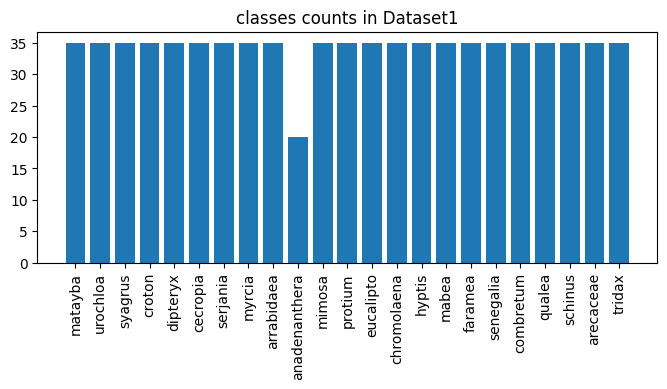

In [22]:
import matplotlib.pyplot as plt

print("number of images:",len(names))
plt.figure(figsize=(8,3))
plt.title('classes counts in Dataset1')
plt.bar(*zip(*classes.items()))
plt.xticks(rotation='vertical')
plt.show()

In [24]:
path_class = {key: [] for key in classes.keys()}
for name in files:
  key = name.replace(' ','_').split('_')[0]
  path_class[key].append(os.path.join(path, name))

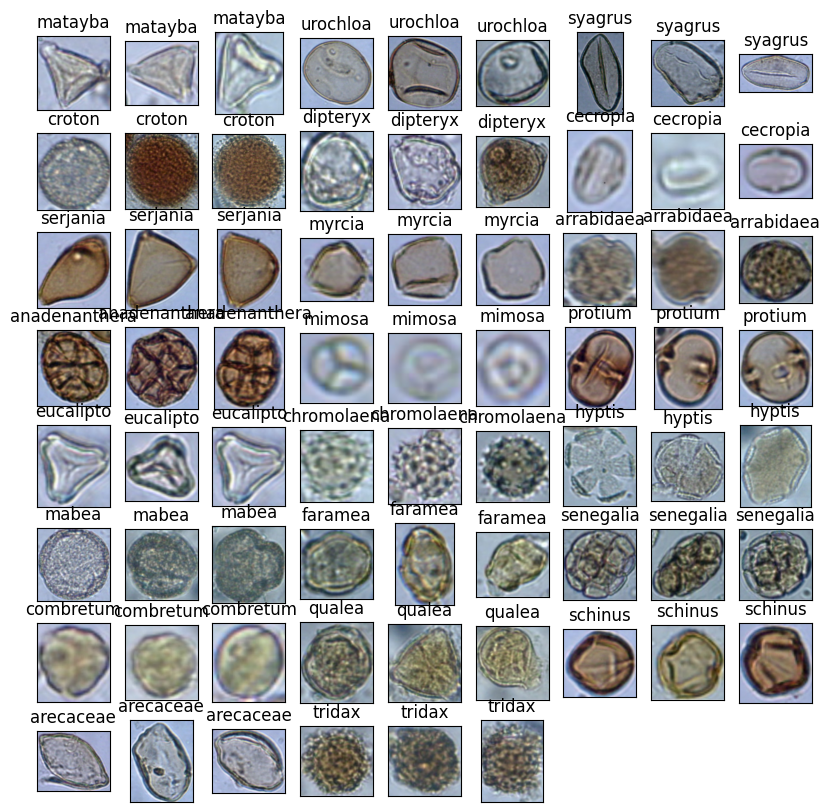

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

fig = plt.figure(figsize=(10, 10))
for i, key in enumerate(path_class.keys()):
    if len(path_class[key]) >= 3:
        img1 = Image.open(path_class[key][0])
        img2 = Image.open(path_class[key][1])
        img3 = Image.open(path_class[key][2])
        ax = fig.add_subplot(8,9, 3*i +1, xticks=[], yticks=[])
        ax.imshow(img1)
        ax.set_title(key)
        ax = fig.add_subplot(8,9, 3*i +2, xticks=[], yticks=[])
        ax.imshow(img2)
        ax.set_title(key)
        ax = fig.add_subplot(8,9, 3*i +3, xticks=[], yticks=[])
        ax.imshow(img3)
        ax.set_title(key)

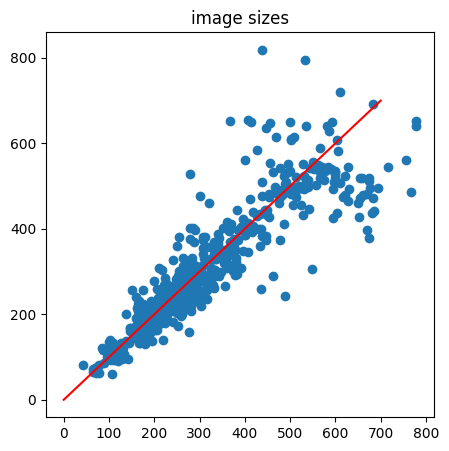

In [37]:
import os
import cv2 as CV2
size = [CV2.imread(os.path.join(path, name)).shape[:2] for name in image_files]
x,y = zip(*size)
fig = plt.figure(figsize=(5, 5))
plt.scatter(x,y)
plt.title('image sizes')
plt.plot([0,700],[0,700], 'r')

In [38]:
def process_img(img, size = (128,128)):
  img = CV2.resize(img, size)
  img = img/255.0
  return img

In [55]:
import os
import cv2 as CV2
import numpy as np # Import numpy

# Assuming 'path' is defined in a previous cell, if not, you might need to define it
# path = "/path/to/your/dataset" # Uncomment and set the correct path if needed
# If using the kagglehub download method, get the path from the output of that cell:
path = "/root/.cache/kagglehub/datasets/andrewmvd/pollen-grain-image-classification/versions/1" # Update with the actual path

x,y = [], []
# Get all entries in the directory specified by 'path'
all_entries = os.listdir(path)

# Filter out directories and keep only files
image_files = [entry for entry in all_entries if os.path.isfile(os.path.join(path, entry))]

for name in image_files:
  img_path = os.path.join(path, name) # Construct the full image path
  img = CV2.imread(img_path)
  if img is not None: # Check if the image was read successfully
    x.append(process_img(img))
    y.append(name.replace(' ','_').split('_')[0])
  else:
    print(f"Warning: Could not read image file: {img_path}")

x = np.array(x) # Corrected typo

In [56]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le = LabelEncoder()
y_le = le.fit_transform(y)
y_cat = to_categorical(y_le, 23)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.285, stratify=y_cat)
print("Image in each class in Test set: {}".format(np.sum(y_test, axis=0))) # Corrected typo

Image in each class in Test set: [ 6. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.]


In [79]:
from keras.models import Sequential # Import Sequential model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Import necessary layers

input_shape = x_train[0].shape

output_shape = 23

model = Sequential()

model.add (Conv2D (filters = 16, kernel_size = 3, input_shape = input_shape, activation= 'relu', padding='same'))

model.add(MaxPooling2D(pool_size=2))

model.add (Conv2D(filters = 32, kernel_size = 2, activation= 'relu', padding= 'same'))

model.add (MaxPooling2D(pool_size=2))

model.add (Conv2D (filters = 64, kernel_size = 2, activation= 'relu', padding= 'same')) # Corrected typo 'ativation'

model.add(MaxPooling2D(pool_size=2))

model.add (Conv2D (filters = 128, kernel_size = 2, activation= 'relu', padding= 'same' ))

model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dropout(0.2)) # Assuming the user intended a dropout rate

model.add(Dense(500, activation= 'relu'))

#model add(Dropout(#2)) # Removed incomplete commented line

model.add(Dense(150, activation= 'relu'))

#model add(Dropout(8.2)) # Removed incomplete commented line

model.add(Dense(output_shape, activation= 'softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        75,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         3,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,803 (16.09 MB)

 Trainable params: 4,218,803 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
print('model is compiled')

model is compiled


In [87]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagener = ImageDataGenerator(
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                horizontal_flip=True,
                vertical_flip=True,)
datagener.fit(x_train)

In [91]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

batch_size = 4
epochs = 50
model_path = 'cnn.keras' # Changed filepath extension to .keras
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20),
             ModelCheckpoint (filepath = model_path, save_best_only = True)]

history =  model.fit(
    datagener.flow(x_train, y_train, batch_size=batch_size),
    batch_size = batch_size,
    steps_per_epoch = len(x_train) // batch_size,
    epochs = epochs,
    validation_data = (x_test, y_test),
    callbacks = callbacks,
    verbose = 1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.0448 - loss: 3.1661 - val_accuracy: 0.0531 - val_loss: 3.1332
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.0731 - loss: 3.1128 - val_accuracy: 0.0885 - val_loss: 2.8573
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - accuracy: 0.0802 - loss: 2.8373 - val_accuracy: 0.1416 - val_loss: 2.5819
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 0.1242 - loss: 2.7055 - val_accuracy: 0.1460 - val_loss: 2.5665
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.0951 - loss: 2.5904 - val_accuracy: 0.1903 - val_loss: 2.3949
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.1294 - loss: 2.5139 - val_accuracy: 0.2389 - val_loss: 2.3102
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.1532 - loss: 2.3996 - val_accuracy: 0.2832 - val_loss: 2.2247
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.2190 - loss: 2.2919 - val

In [95]:
model.load_weights(model_path)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: {}'.format(score[1]))

Test accuracy: 0.7168141603469849


In [97]:
model.save("model.h5")

In [110]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array # Import load_img and img_to_array
import numpy as np # Import numpy

#Load image and resize
# Make sure to replace 'drive/MyDrive/Colab Notebooks/data/urochloa (35).jpg' with the actual path to your test image
img=load_img('/content/urochloa (1).jpg', target_size=(128, 128))

# img = img.resize((128, 128)) # load_img with target_size already resizes, this line is redundant

#Convert to array and preprocess
x = img_to_array(img)

x = np.expand_dims(x, axis=0)

# Predict
# Corrected typo anp.argask to np.argmax
a = np.argmax(model.predict(x), axis=1)

# index ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2'] # Original incomplete index
# Updated index to match the 23 output classes of the model
index = [str(i) for i in range(23)]

result =str(index[a[0]])

result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


'1'

In [120]:
from keras.preprocessing.image import load_img, img_to_array # Import necessary functions for image processing
import numpy as np # Import numpy

# Assuming 'le' (LabelEncoder) is defined and fitted in a previous cell (cell SX8es0QR_lMD)
# If not, you'll need to run the cell where le is defined and fitted.

# Assuming 'model' is defined in a previous cell (e.g., cell JItv55YO_lGy)
# If not, you'll need to run the cell where the model is defined.

# Define op using the classes from the LabelEncoder for mapping predictions to class names
if 'le' in locals():
    op = le.classes_
else:
    op = [str(i) for i in range(23)] # Fallback if le is not defined, though results won't be actual class names
    print("Warning: LabelEncoder 'le' is not defined. Predicted class index will be printed instead of class name.")

# --- Process the first image (assuming a is already defined from a previous cell run) ---
# If 'a' is not defined, the next line will cause a NameError.
# It's better to run the prediction code for each image you want to test in this cell.

# Example for the first image (assuming prediction was made and stored in 'a'):
# if 'a' in locals():
#     if 'op' in locals():
#         result = op[a[0]]
#         print(f"Predicted class for the first image (from 'a'): {result}")
#     else:
#          print(f"Predicted class index for the first image (from 'a'): {a[0]}")
# else:
#     print("Variable 'a' is not defined. Please run the prediction code for the first image.")


# --- Load, preprocess, and predict for the second image (eucalipto_23.jpg) ---
# Make sure to replace 'ddrive/MyDriverive/MyDrive/Colab Notebooks/data/eucalipto_23.jpg' with the actual path to your test image
test_image_path_2 = '/content/arecaceae_01.jpg' # <--- Update with the path to your second test image

try:
    print(f"\nProcessing image: {test_image_path_2}")
    img_2 = load_img(test_image_path_2, target_size=(128, 128))
    x_2 = img_to_array(img_2)
    x_2 = np.expand_dims(x_2, axis=0)

    # Predict for the second image
    a_2 = np.argmax(model.predict(x_2), axis=1)

    # Get and print the predicted class name for the second image
    if 'op' in locals():
        result_2 = op[a_2[0]]
        print(f"Predicted class index for {os.path.basename(test_image_path_2)}: {a_2[0]}")
        print(f"Predicted class name for {os.path.basename(test_image_path_2)}: {result_2}")
    else:
         print(f"Predicted class index for {os.path.basename(test_image_path_2)}: {a_2[0]}")


except FileNotFoundError:
    print(f"Error: Test image file not found at {test_image_path_2}. Please provide the correct path.")
except NameError as e:
    print(f"NameError: {e}. Please ensure 'model' and 'le' are defined in previous cells.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Processing image: /content/arecaceae_01.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted class index for arecaceae_01.jpg: 1
Predicted class name for arecaceae_01.jpg: arecaceae


In [133]:
#Load image and resize

img = load_img('/content/anadenanthera_16.jpg',target_size=(128, 128))

img = img.resize((128, 128))

#Convert to array and preprocess

img_to_array(img)

np.expand_dims(x, axis=0)

#Predic

a = np.argmax(model.predict(x), axis=1)

#Define class names

class_names = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum']

#Predict

y_pred = model.predict(x)

class_idx= np.argmax(y_pred, axis=1) [0]

class_name= class_names[class_idx]

print("Predicted class index: ", class_idx)

print("Predicted class name:", class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class index:  1
Predicted class name: anadenanthera


In [151]:
from keras.preprocessing.image import load_img, img_to_array # Import necessary functions
import numpy as np
import os
image_path = '/content/croton_23.jpg' # <--- Update with the actual path to your test image

try:
    img = load_img(image_path, target_size=(128, 128)) # Load and resize
    img_array = img_to_array(img) # Convert to array
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    # Predict using the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0] # Get the index of the predicted class

    # Get the class name using the LabelEncoder classes
    if 'le' in locals(): # Check if le is defined
        class_names = le.classes_
        predicted_class_name = class_names[predicted_class_index]

        print(f"Predicted class index: {predicted_class_index}")
        print(f"Predicted class name: {predicted_class_name}")
    else:
        print(f"Predicted class index: {predicted_class_index}")
        print("Warning: LabelEncoder 'le' is not defined. Cannot map index to class name.")


except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}. Please provide the correct path.")
except NameError as e:
    print(f"NameError: {e}. Please ensure 'model' and 'le' are defined in previous cells.")
except IndexError:
     print(f"Error: Predicted class index {predicted_class_index} is out of range for the available class names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class index: 1
Predicted class name: arecaceae


In [157]:
from keras.preprocessing.image import load_img, img_to_array # Import necessary functions
import numpy as np
image_path = '/content/hyptis_23.jpg' # <--- Update with the actual path to your test image

try:
    img = load_img(image_path, target_size=(128, 128)) # Load and resize
    img_array = img_to_array(img) # Convert to array
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension (Corrected typo axis=e)

    # Predict using the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0] # Get the index of the predicted class

    # Get the class name using the LabelEncoder classes
    if 'le' in locals(): # Check if le is defined
        class_names = le.classes_
        predicted_class_name = class_names[predicted_class_index]

        print(f"Predicted class index: {predicted_class_index}")
        print(f"Predicted class name: {predicted_class_name}")
    else:
        print(f"Predicted class index: {predicted_class_index}")
        print("Warning: LabelEncoder 'le' is not defined. Cannot map index to class name.")


except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}. Please provide the correct path.")
except NameError as e:
    print(f"NameError: {e}. Please ensure 'model' and 'le' are defined in previous cells.")
except IndexError:
     print(f"Error: Predicted class index {predicted_class_index} is out of range for the available class names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class index: 7
Predicted class name: dipteryx
